In [25]:
import numpy as np
import pandas as pd

In [26]:
data=pd.read_csv("movie.csv")
data

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [27]:
data.shape

(40000, 2)

To check unique reviews

In [28]:
data['text'].nunique()

39723

delete duplicate data

In [29]:
data=data.drop_duplicates()

to check if there are any null entries

In [30]:
data.isnull().sum()

text     0
label    0
dtype: int64

In [31]:
data['label'].value_counts()

label
1    19908
0    19815
Name: count, dtype: int64

data is balanced as there is not much difference in number of positive and negative 

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
new_col=data['text'].str.len()#create a series of reviews list
data['length']=new_col#add length column
data


C:\Users\HARSH SARAWAGI\AppData\Local\Temp\ipykernel_3404\4033236212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['length']=new_col#add length column


,text,label,length
0,I grew up (b. 1965) watching and loving the Th...,0,874
1,"When I put this movie in my DVD player, and sa...",0,1811
2,Why do people who do not know what a particula...,0,983
3,Even though I have great interest in Biblical ...,0,351
4,Im a die hard Dads Army fan and nothing will e...,1,983
...,...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1,3111
39996,This movie is an incredible piece of work. It ...,1,291
39997,My wife and I watched this movie because we pl...,0,1092
39998,"When I first watched Flatliners, I was amazed....",1,1045


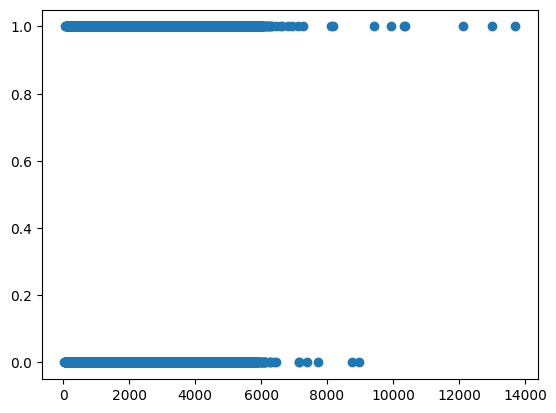

In [34]:
plt.scatter(data['length'],data['label'])

In [35]:
import nltk
from nltk.corpus import stopwords

In [36]:
stop_words=set(stopwords.words('english'))


In [37]:
import re
def filtering(x):
    #print (x)
    pattern =r'[^a-zA-Z\s]'
    x=re.sub(pattern,'',x)
    
    #print(y)
    #print (x)

    str_lst=str(x).lower().split()# converts to lower case and make list of words
    # print(str_lst)
    str_lst_new=[]
    for word in str_lst:
        if word not in stop_words:
            str_lst_new.append(word)
    #print(str_lst_new)
    
    x=' '.join(str(ele) for ele in str_lst_new)
    #print(x)
    return x
data_new=data['text'].apply(lambda x: filtering(x))
data['text']=data_new
data

C:\Users\HARSH SARAWAGI\AppData\Local\Temp\ipykernel_3404\1597289402.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text']=data_new


,text,label,length
0,grew b watching loving thunderbirds mates scho...,0,874
1,put movie dvd player sat coke chips expectatio...,0,1811
2,people know particular time past like feel nee...,0,983
3,even though great interest biblical movies bor...,0,351
4,im die hard dads army fan nothing ever change ...,1,983
...,...,...,...
39995,western union something forgotten classic west...,1,3111
39996,movie incredible piece work explores every noo...,1,291
39997,wife watched movie plan visit sicily stromboli...,0,1092
39998,first watched flatliners amazed necessary feat...,1,1045


In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data['text'],data['label'],random_state=101,test_size=0.2)
print(x_train.shape)
print(x_test.shape)

(31778,)
(7945,)


In [39]:
x_train=x_train.apply(lambda x: nltk.word_tokenize(x))
x_train

27305    [animaleating, geek, scenes, bad, would, think...
24799    [thought, excellent, movie, gary, cole, played...
34138    [intelligent, wry, thrilling, invisible, man, ...
32905    [picked, one, music, done, hans, zimmer, custo...
6991     [hard, believe, action, packed, jet, li, movie...
                               ...                        
12389    [got, chance, talk, cocreator, rebecca, cammis...
5703     [movie, amazing, tears, end, movie, okay, know...
8018     [first, time, saw, woman, black, think, time, ...
17800    [apparent, attempt, avoid, remaking, original,...
17987    [well, groomed, well, behaved, teen, meg, till...
Name: text, Length: 31778, dtype: object

In [40]:
def lemmatizer(x):
    str_new=[]
    for i in range(0,len(x)):
        #print(x[i])
        str_new.append(nltk.stem.WordNetLemmatizer().lemmatize(x[i]))
    #print(str_new)
    return ''.join(str(ele+' ') for ele in str_new)
x_train=x_train.apply(lambda x: lemmatizer(x))
x_train


27305    animaleating geek scene bad would think watche...
24799    thought excellent movie gary cole played role ...
34138    intelligent wry thrilling invisible man stood ...
32905    picked one music done han zimmer customer meta...
6991     hard believe action packed jet li movie could ...
                               ...                        
12389    got chance talk cocreator rebecca cammisa high...
5703     movie amazing tear end movie okay know acting ...
8018     first time saw woman black think time knowledg...
17800    apparent attempt avoid remaking original movie...
17987    well groomed well behaved teen meg tilly must ...
Name: text, Length: 31778, dtype: object

In [41]:
x_test=x_test.apply(lambda x: nltk.word_tokenize(x))
x_test
def lemmatizer(x):
    str_new=[]
    for i in range(0,len(x)):
        #print(x[i])
        str_new.append(nltk.stem.WordNetLemmatizer().lemmatize(x[i]))
    #print(str_new)
    return ''.join(str(ele+' ') for ele in str_new)
x_test=x_test.apply(lambda x: lemmatizer(x))
x_test

38814    greatest film saw whereas im used mainstream m...
23933    barbarian geisha john wayne play townsend harr...
33064    rented back honestly cant remember anything sp...
39575    reading review film reminded good good aspect ...
17919    daffy duck sign hanging every inch every avail...
                               ...                        
31561    ive studying brazilian cinema since stumbled o...
15041    well guess mood movie really grabbed beginning...
36638    movie awed much watch least year time find unc...
36371    film brilliant soundtrack superb acting pretty...
13970    dope sick love really remarkable documentary m...
Name: text, Length: 7945, dtype: object

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer().fit(x_train)
#vect_test=TfidfVectorizer().fit(x_test)

#print(vect_test)
#print(vect_train)
vectorised_x_train=vect.transform(x_train)
vectorised_x_test=vect.transform(x_test)


Accuracy using Logistic Regression: 88.90 %
roc_auc_score using Logistic Regression: 0.89
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      3808
           1       0.91      0.88      0.89      4137

    accuracy                           0.89      7945
   macro avg       0.89      0.89      0.89      7945
weighted avg       0.89      0.89      0.89      7945



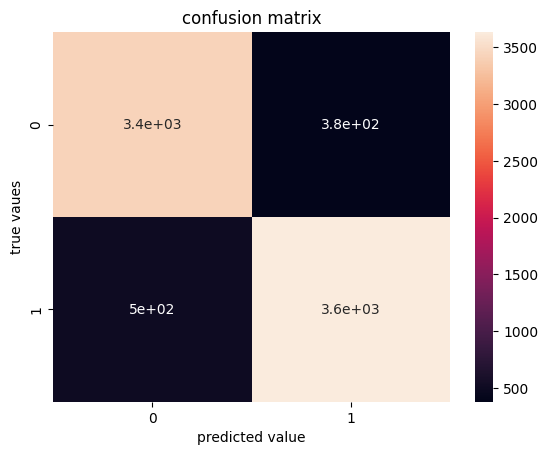

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score,confusion_matrix,classification_report

model=LogisticRegression().fit(vectorised_x_train,y_train)
y_predict=model.predict(vectorised_x_test)
print(f"Accuracy using Logistic Regression: {accuracy_score(y_predict,y_test)*100:.2f} %")
print(f"roc_auc_score using Logistic Regression: {roc_auc_score(y_predict,y_test):.2f}")
print(classification_report(y_predict,y_test))
#print(confusion_matrix(y_predict,y_test))
sns.heatmap(confusion_matrix(y_predict,y_test),annot=True)
plt.title("confusion matrix")
plt.xlabel("predicted value")
plt.ylabel("true vaues")
plt.show()

In [44]:
# from sklearn import svm

# model=svm.SVC(kernel='linear').fit(vectorised_x_train,y_train)
# y_predict=model.predict(vectorised_x_test)
# accuracy_score(y_predict,y_test)

Accuracy using KNN: 76.07 %
roc_auc_score using KNN: 0.77
              precision    recall  f1-score   support

           0       0.68      0.80      0.74      3335
           1       0.84      0.73      0.78      4610

    accuracy                           0.76      7945
   macro avg       0.76      0.77      0.76      7945
weighted avg       0.77      0.76      0.76      7945



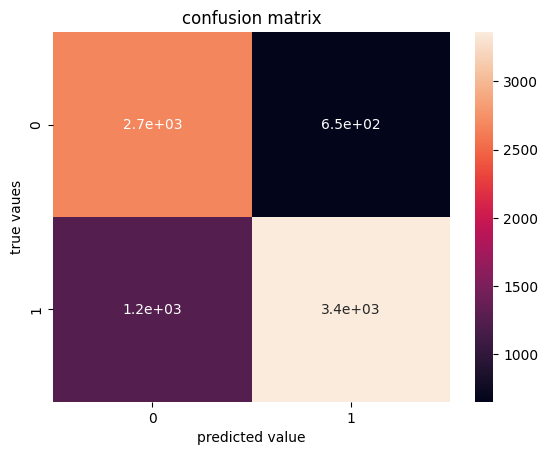

In [45]:
from sklearn import neighbors

knn=neighbors.KNeighborsClassifier(n_neighbors=3)
knn_model=knn.fit(vectorised_x_train,y_train)
y_predict=knn_model.predict(vectorised_x_test)
print(f"Accuracy using KNN: {accuracy_score(y_predict,y_test)*100:.2f} %")
print(f"roc_auc_score using KNN: {roc_auc_score(y_predict,y_test):.2f}")
print(classification_report(y_predict,y_test))
#print(confusion_matrix(y_predict,y_test))
sns.heatmap(confusion_matrix(y_predict,y_test),annot=True)
plt.title("confusion matrix")
plt.xlabel("predicted value")
plt.ylabel("true vaues")
plt.show()


Accuracy using RandomForest: 84.54 %
roc_auc_score using RandomForest: 0.85
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      3998
           1       0.84      0.85      0.85      3947

    accuracy                           0.85      7945
   macro avg       0.85      0.85      0.85      7945
weighted avg       0.85      0.85      0.85      7945



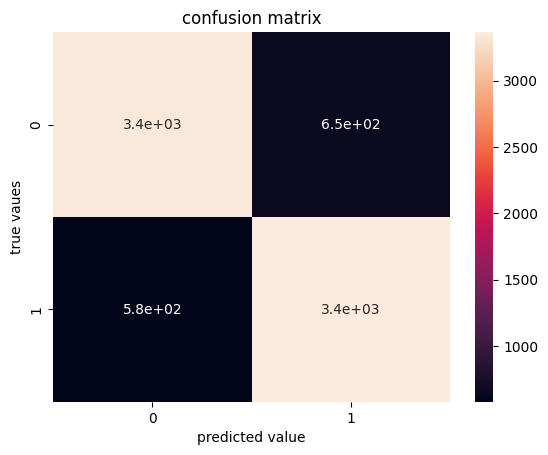

In [46]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier().fit(vectorised_x_train,y_train)
y_predict=model.predict(vectorised_x_test)
print(f"Accuracy using RandomForest: {accuracy_score(y_predict,y_test)*100:.2f} %")
print(f"roc_auc_score using RandomForest: {roc_auc_score(y_predict,y_test):.2f}")
print(classification_report(y_predict,y_test))
#print(confusion_matrix(y_predict,y_test))
sns.heatmap(confusion_matrix(y_predict,y_test),annot=True)
plt.title("confusion matrix")
plt.xlabel("predicted value")
plt.ylabel("true vaues")
plt.show()
